In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

In [14]:
np.random.seed(42)
n_samples, n_features = 100, 50
X, y = make_regression(n_samples=n_samples, n_features=n_features, n_informative=10, noise=0.1, random_state=42)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
ols = LinearRegression()
ols.fit(X_train, y_train)

LinearRegression()

In [17]:
alphas = [0.01, 0.1, 1]
lasso_models = [Lasso(alpha=alpha) for alpha in alphas]

In [18]:
for model in lasso_models:
    model.fit(X_train, y_train)

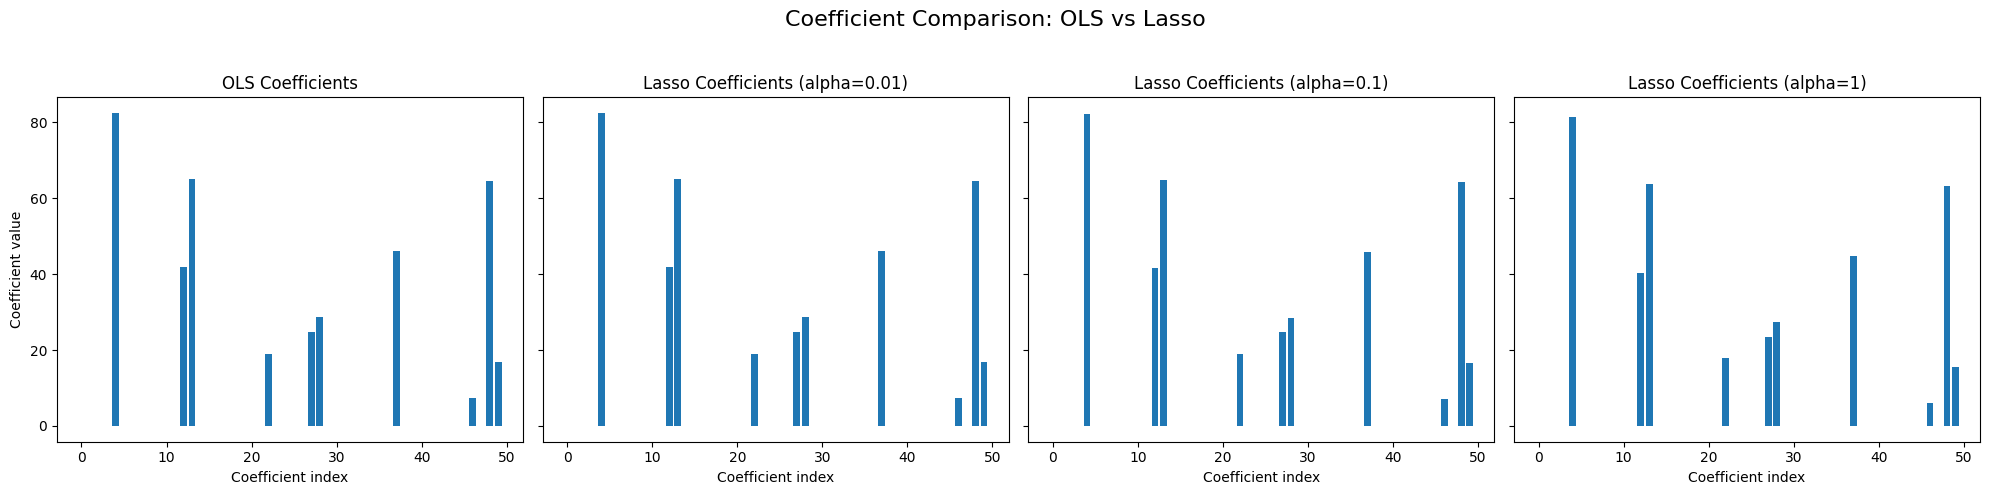

In [30]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
fig.suptitle('Coefficient Comparison: OLS vs Lasso', fontsize=16)
axs[0].bar(range(n_features), ols.coef_)
axs[0].set_title('OLS Coefficients')
axs[0].set_xlabel('Coefficient index')
axs[0].set_ylabel('Coefficient value')

for i, alpha in enumerate(alphas):
    axs[i + 1].bar(range(n_features), lasso_models[i].coef_)
    axs[i + 1].set_title(f'Lasso Coefficients (alpha={alpha})')
    axs[i + 1].set_xlabel('Coefficient index')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [31]:
print("OLS Regression:")
print(f"Training score: {ols.score(X_train, y_train)}")
print(f"Testing score: {ols.score(X_test, y_test)}")

OLS Regression:
Training score: 0.9999998222085488
Testing score: 0.999998772423489


In [32]:
for i, alpha in enumerate(alphas):
    lasso = lasso_models[i]
    print(f"\nLasso Regression (alpha={alpha}):")
    print(f"Training score: {lasso.score(X_train, y_train)}")
    print(f"Testing score: {lasso.score(X_test, y_test)}")
    print(f"Number of non-zero coefficients: {np.sum(lasso.coef_ != 0)}")


Lasso Regression (alpha=0.01):
Training score: 0.9999995657339464
Testing score: 0.9999993494312777
Number of non-zero coefficients: 21

Lasso Regression (alpha=0.1):
Training score: 0.9999922817271575
Testing score: 0.999993118187728
Number of non-zero coefficients: 11

Lasso Regression (alpha=1):
Training score: 0.9992837907843631
Testing score: 0.9992947601610322
Number of non-zero coefficients: 11
